# Classifier Trainig

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle

import sys, os

In [2]:
N_EPOCHS = 500
N_FEATURES = 6 # accel.x, accel.y, accel.z, gyro.x, gyro.y, gyro.z 
# N_FEATURES = 3 # accel.x, accel.y, accel.z
SAMPLE_LEN = 400

## Read Data

In [3]:

samples= {
    'Rest':    [],
    'Up':      [],
    'Down':    [],
    'Forward': [],
    'Back':    []
}

label_to_OH = {
    'Rest':    (1., 0., 0., 0., 0.),
    'Up':      (0., 1., 0., 0., 0.),
    'Down':    (0., 0., 1., 0., 0.),
    'Forward': (0., 0., 0., 1., 0.),
    'Back':    (0., 0., 0., 0., 1.)
}

OH_to_label = {v:k for k,v in label_to_OH.items()}
idx_to_label = {np.argmax(k):v for k,v in OH_to_label.items()}

# C:\Users\itaym\Documents\limudim\semester_8\sequence_labler\output\Back_0000.csv
sample_files_dir = os.path.join('C:/','Users','itaym','Documents','limudim','semester_8','sequence_labler','output')

for sample_file in os.listdir(sample_files_dir):
    if sample_file == 'old':
        continue
    label, _ = sample_file.split('_')
    s = pd.read_csv(os.path.join(sample_files_dir,sample_file)).infer_objects()[['accX','accY','accZ','gyroX','gyroY','gyroZ']].to_numpy()
    samples[label].append(s.ravel())

# FIXME: remove hard coded labels here
X = np.array(samples['Rest'] + samples['Up'] + samples['Down'] + samples['Back'] + samples['Forward'])
y = np.array([0 for _ in samples['Rest']] +
             [1 for _ in samples['Up']] +
             [2 for _ in samples['Down']] +
             [3 for _ in samples['Back']] +
             [4 for _ in samples['Forward']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Data Preview

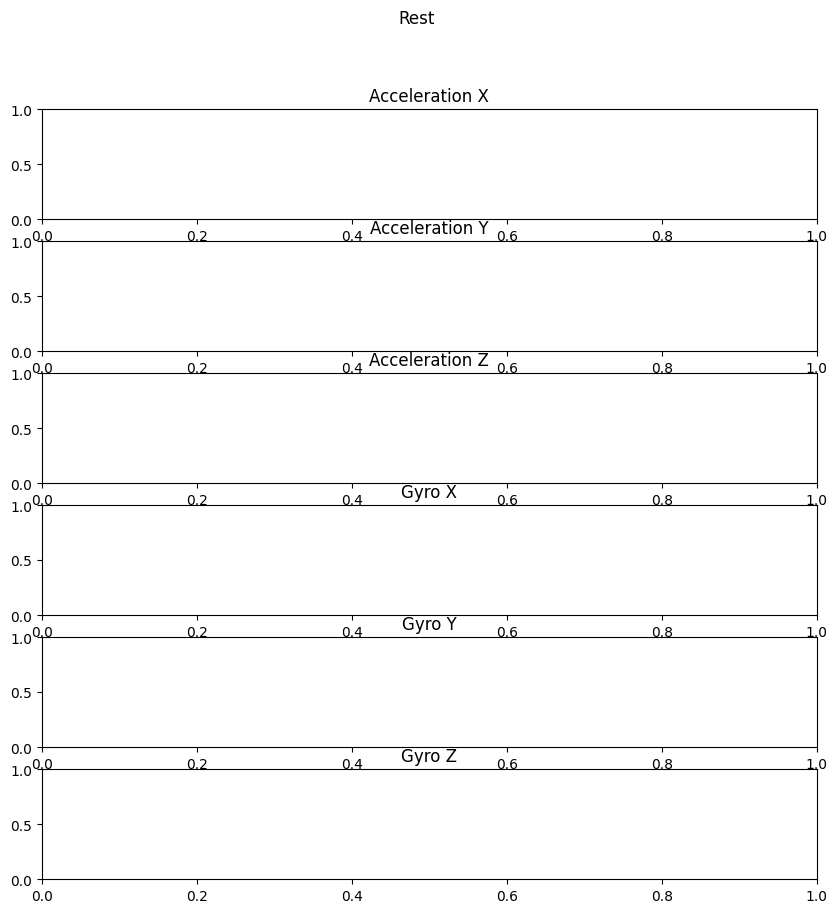

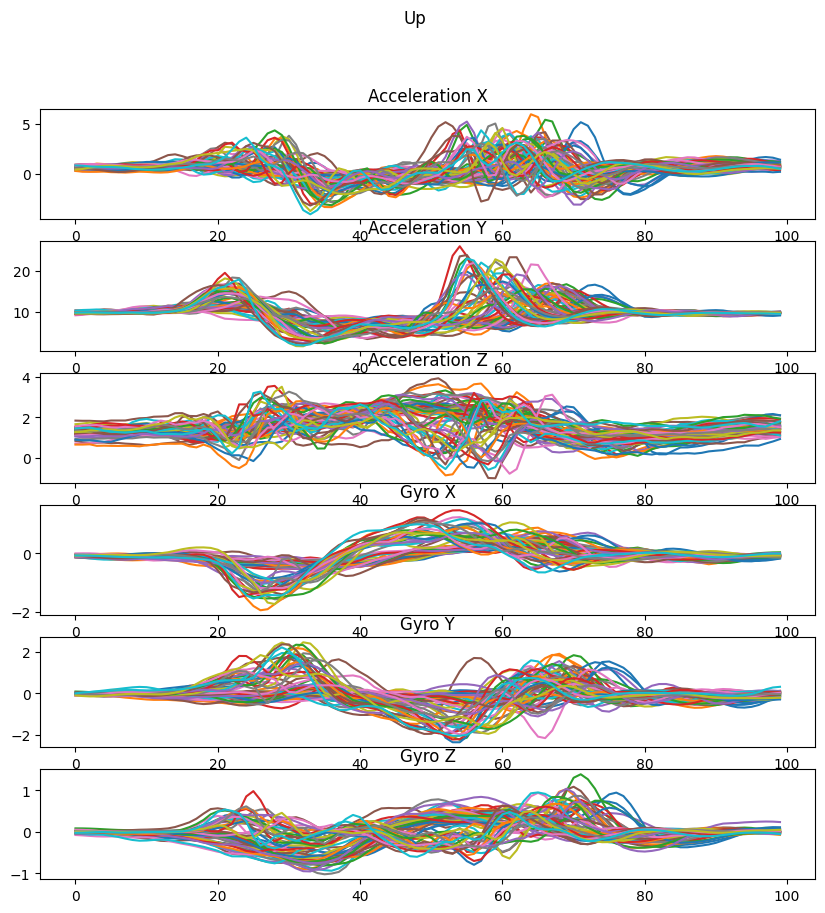

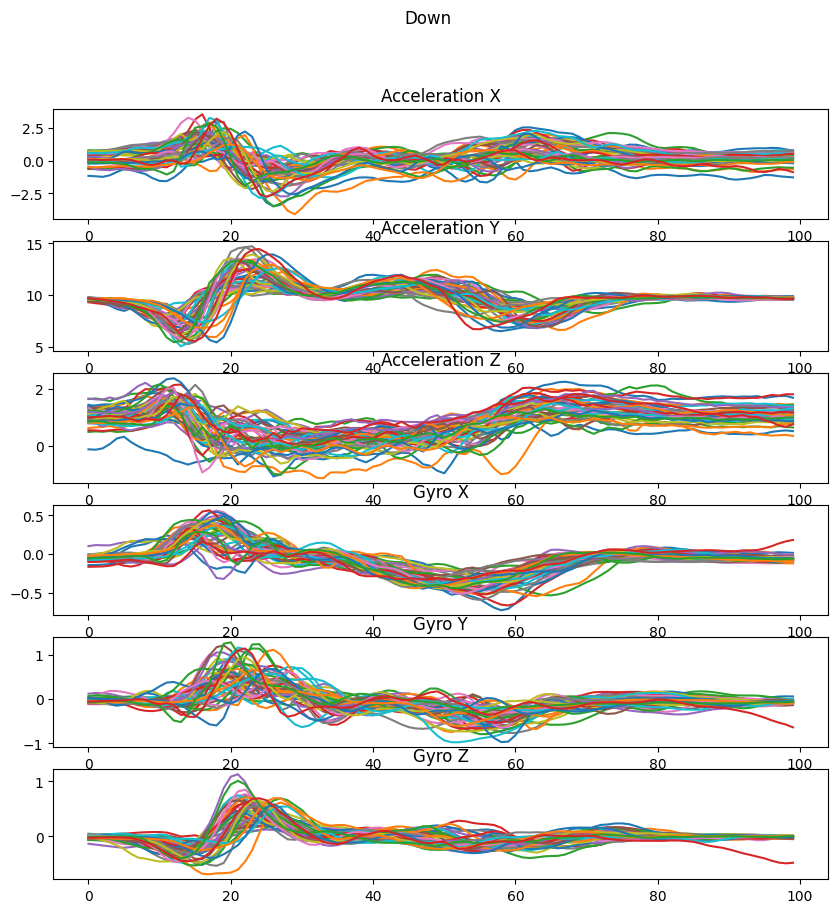

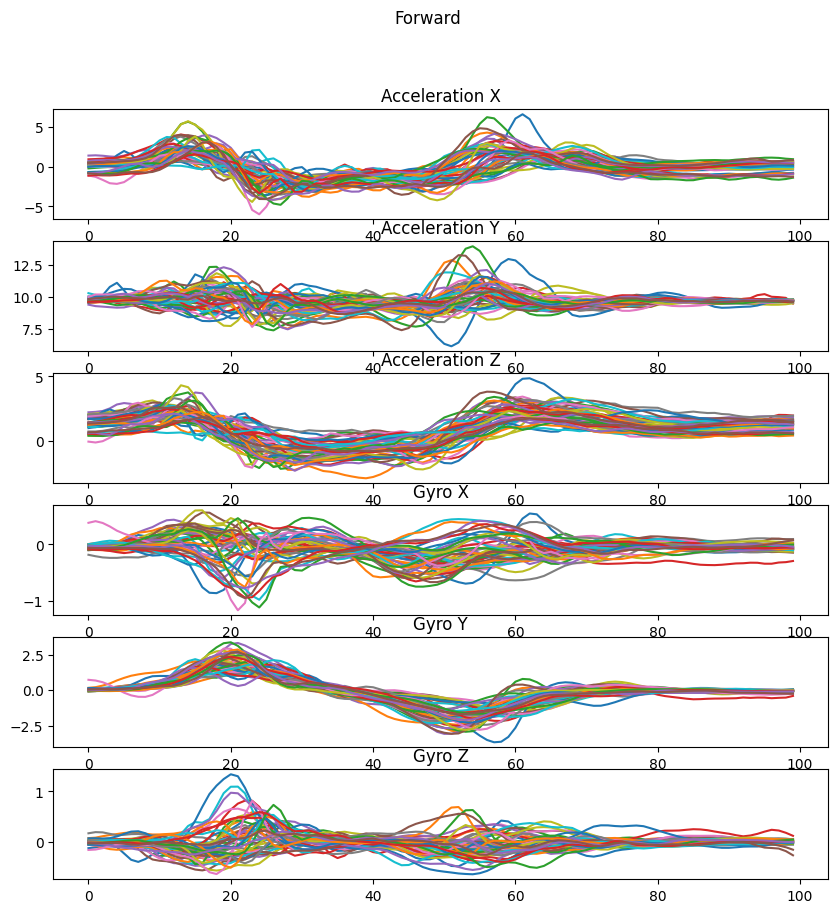

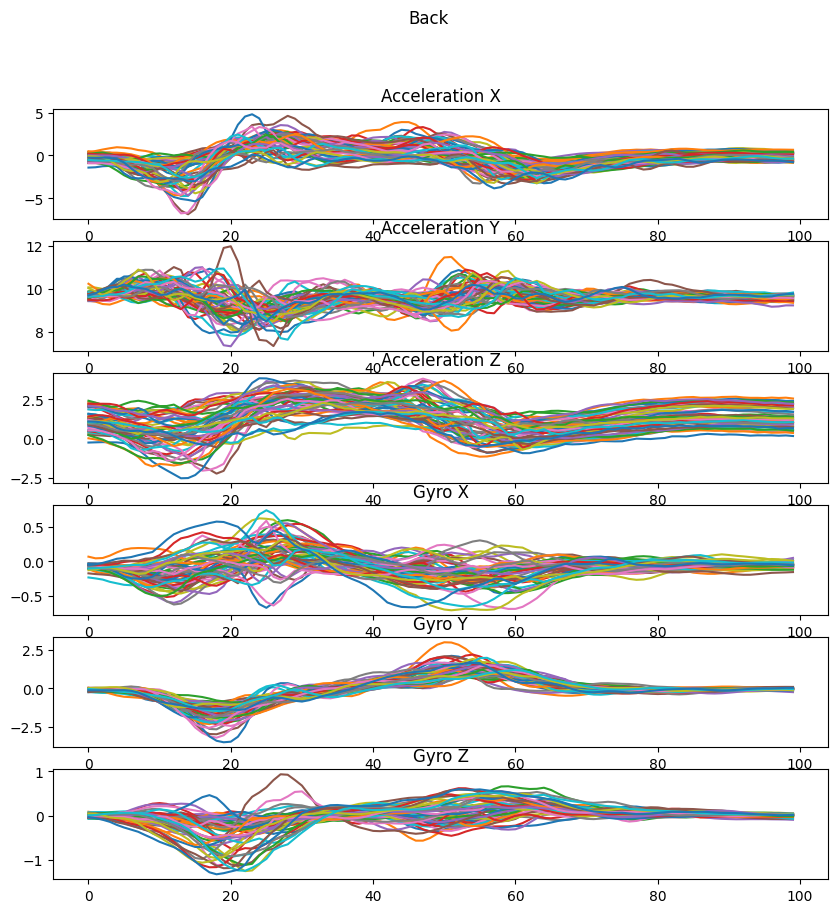

In [10]:
for dir_idx, dir in enumerate(samples.keys()):
    figure = plt.figure(figsize=(10,10))
    figure.suptitle(f'{dir}')
    for axes_idx, axes in enumerate(('Acceleration X',
                                     'Acceleration Y',
                                     'Acceleration Z',
                                     'Gyro X',
                                     'Gyro Y',
                                     'Gyro Z'
                                     )):
        ax = figure.add_subplot(6,1,axes_idx+1)
        ax.set_title(axes)
        for sam in samples[dir]:
            ax.plot(sam[axes_idx::6])

## Define Model

In [5]:
model = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=5)

## Training

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

## Visualize Results

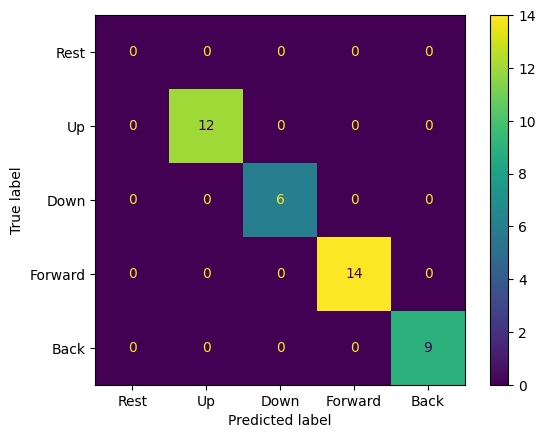

In [7]:
ConfusionMatrixDisplay.from_predictions([idx_to_label[i] for i in y_test], 
                                        [idx_to_label[i] for i in model.predict(X_test)], 
                                        labels=list(label_to_OH.keys()))

## Saving Trained Model

In [8]:
with open("saved_RF_calssifier.pickle", 'wb') as outfile:
    pickle.dump(model, outfile)

In [9]:
model.predict_proba(np.zeros((1,600)))

array([[0.6, 0.3, 0. , 0.1]])